Daily Challenge : NumPy, Pandas & Matplotlib Integration

I. Data Import and Cleaning

In [ ]:
# Librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset loading

power_plants = pd.read_csv('global_power_plant_database.csv')

/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_67555/1101693186.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  power_plants = pd.read_csv('global_power_plant_database.csv')


In [6]:
df = pd.DataFrame(power_plants)

In [4]:
# Initial inspection
print(f"Dataset shape: {power_plants.shape}")
print("\nMissing values per column:")
print(power_plants.isnull().sum().sort_values(ascending=False))

Dataset shape: (34936, 36)

Missing values per column:
other_fuel3                       34844
other_fuel2                       34660
other_fuel1                       32992
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277
generation_data_source            23536
year_of_capacity_data             20049
estimated_generation_gwh_2013     18816
wepp_id                           18702
estimated_generation_gwh_2014     18433
estimated_generation_gwh_2015     17886
commissioning_year                17489
estimated_generation_gwh_2016     17366
owner                             14068
estimated_generation_gwh_2017      1798
geolocation_source                  419
url                                  18
source                               15
estimated_generation_note

# Observation

Huge deficit of data!

Retained Strategy: 

    * Columns with more than 90% of missing values do not bring any useful information.



In [7]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [9]:
df.describe()


,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [10]:
df.columns


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [11]:
df.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


# Missing Data Management

1. Columns to be fully deleted

In [14]:
# Suppression of required columns

cols_to_drop = ['other_fuel3', 'other_fuel2', 'other_fuel1', 
               'generation_gwh_2013', 'generation_gwh_2014',
               'generation_gwh_2015', 'generation_gwh_2016',
               'generation_gwh_2017', 'generation_gwh_2018',
               'generation_gwh_2019', 'wepp_id']

power_plants = power_plants.drop(columns=cols_to_drop)

2. Columns to be specifically  treated

In [16]:
# a) Données Temporelles (commissioning_year)

# Remplacer les années manquantes par la médiane par pays
power_plants['commissioning_year'] = power_plants.groupby('country')['commissioning_year'].transform(
    lambda x: x.fillna(x.median()))

/Users/teddan/Desktop/GenAI/.venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/teddan/Desktop/GenAI/.venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/teddan/Desktop/GenAI/.venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/teddan/Desktop/GenAI/.venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/teddan/Desktop/GenAI/.venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/teddan/Desktop/GenAI/.v

# Observation

Les valeurs manquantes de 'commissioning_year' / année de mise en service ont bien été gérées via une stratégie d'imputation intelligente. 

> groupby('country') : Les données ont étégroupées par pays car les centrales d'un même pays ont souvent des caractéristiques similaires (politiques énergétiques, développement technologique)

> commissioning_year'.transform(...) : Applique une transformation à la colonne commissioning_year pour chaque groupe (pays) séparément.

lambda x: x.fillna(x.median())
    * Pour chaque groupe (pays), remplace les valeurs manquantes (NaN) par la médiane des années de mise en service de ce pays.

    * La médiane (valeur centrale) est choisie plutôt que la moyenne pour éviter l'influence des années extrêmes (ex.: une très ancienne centrale ou une centrale récente).

In [19]:
# Missing values check after processing

print("nMissing values after processing in commissioning_year :", 
      power_plants['commissioning_year'].isnull().sum())

nMissing values after processing in commissioning_year : 4816


# Observation

il reste 4 816 valeurs manquantes dans commissioning_year après l'imputation par la médiane par pays (contre 17 489 initiales).

> stratégie complémentaire : Imputation par la médiane du type de centrale
Pour les pays où toutes les années sont manquantes (d'où les 4 816 restantes)

In [20]:
power_plants['commissioning_year'] = power_plants.groupby('primary_fuel')['commissioning_year'].transform(
    lambda x: x.fillna(x.median()))

In [21]:
# Missing values check after processing

print("nMissing values after processing in commissioning_year :", 
      power_plants['commissioning_year'].isnull().sum())

nMissing values after processing in commissioning_year : 0


# Observation

Imputation par la médiane du type de centrale a suffi, il n'a pas été nécessaire d'aller jusqu'à l'imputation par la médiane globale !

L'analyse des données temporelles peut se faire en toute confiance !

In [25]:
# Handle missing values
power_plants['capacity_mw'] = power_plants['capacity_mw'].fillna(
    power_plants.groupby('primary_fuel')['capacity_mw'].transform('median')
)
power_plants = power_plants.dropna(subset=['country', 'primary_fuel'])

In [26]:
# Convert to efficient numerical types
power_plants['capacity_mw'] = pd.to_numeric(power_plants['capacity_mw'], downcast='float')
power_plants['generation_gwh'] = pd.to_numeric(power_plants['generation_gwh_2017'], downcast='float', errors='coerce')

KeyError: 'generation_gwh_2017'

In [24]:
df.columns


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

# Observation 

L'erreur indiquée semble dire que 'generation_gwh_2017' alors que la colonne est bien présente ...


In [27]:

# 1. D'abord, vérifiez les colonnes disponibles
print("Colonnes disponibles :", power_plants.columns.tolist())

Colonnes disponibles : ['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data', 'generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017', 'generation_gwh']


In [28]:
# 2. Cherchez les colonnes similaires (elles peuvent avoir un nom légèrement différent)
generation_cols = [col for col in power_plants.columns if 'generation' in col.lower()]
print("Colonnes de génération disponibles :", generation_cols)

Colonnes de génération disponibles : ['generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017', 'generation_gwh']


In [29]:
# 3. Utilisez la colonne appropriée (exemple avec la première trouvée)
if generation_cols:  # Si des colonnes existent
    power_plants['generation_gwh'] = pd.to_numeric(
        power_plants[generation_cols[0]],  # Prend la première colonne trouvée
        downcast='float',
        errors='coerce'  # Convertit les erreurs en NaN
    )
else:
    # Solution alternative si aucune colonne n'existe
    print("Aucune colonne de génération trouvée - création à partir de la capacité")
    power_plants['generation_gwh'] = power_plants['capacity_mw'] * 24 * 365 * 0.45 / 1000  # Estimation

In [30]:
print("Valeurs manquantes dans generation_gwh :", 
      power_plants['generation_gwh'].isna().sum())
print("Exemple de valeurs :\n", power_plants['generation_gwh'].head())

Valeurs manquantes dans generation_gwh : 34936
Exemple de valeurs :
 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: generation_gwh, dtype: float32


# Observation

Pour rappel : données manquantes

generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277

In [31]:
power_plants.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'year_of_capacity_data',
 'generation_data_source',
 'estimated_generation_gwh_2013',
 'estimated_generation_gwh_2014',
 'estimated_generation_gwh_2015',
 'estimated_generation_gwh_2016',
 'estimated_generation_gwh_2017',
 'estimated_generation_note_2013',
 'estimated_generation_note_2014',
 'estimated_generation_note_2015',
 'estimated_generation_note_2016',
 'estimated_generation_note_2017',
 'generation_gwh']

# Observation

Problème Identifié
Vous avez deux types de colonnes de génération :

generation_gwh : Colonne déjà présente (probablement vide ou mal remplie)

estimated_generation_gwh_XXXX : Colonnes estimées par année (2013-2017)

In [32]:
# 1. Supprimer la colonne 'generation_gwh' vide existante
power_plants.drop(columns=['generation_gwh'], inplace=True, errors='ignore')

# 2. Créer une nouvelle colonne en combinant les estimations annuelles (priorité aux années récentes)
generation_cols = [
    'estimated_generation_gwh_2017', 
    'estimated_generation_gwh_2016',
    'estimated_generation_gwh_2015',
    'estimated_generation_gwh_2014',
    'estimated_generation_gwh_2013'
]
power_plants['generation_gwh'] = power_plants[generation_cols].bfill(axis=1).iloc[:, 0]

# 3. Estimation pour les données manquantes (méthode physique)
power_plants['generation_gwh'] = power_plants['generation_gwh'].fillna(
    power_plants['capacity_mw'] * 24 * 365 * 0.45 / 1000  # Facteur de charge 45%
)

In [33]:
print("Statistiques de generation_gwh :")
print(power_plants['generation_gwh'].describe())
print("\nValeurs manquantes :", power_plants['generation_gwh'].isna().sum())

Statistiques de generation_gwh :
count    34936.000000
mean       688.255741
std       2427.245347
min          0.000000
25%          8.360000
50%         37.905000
75%        217.680000
max      82810.770000
Name: generation_gwh, dtype: float64

Valeurs manquantes : 0


Améliorations avancées

1. Facteur de Charge par Type d'Énergie

In [34]:
# Définir des facteurs réalistes par type de centrale

charge_factors = {
    'Coal': 0.6,
    'Hydro': 0.45,
    'Wind': 0.3,
    'Nuclear': 0.85,
    'Solar': 0.2
}
power_plants['capacity_factor'] = power_plants['primary_fuel'].map(charge_factors)

# Estimation améliorée
power_plants['generation_gwh_estimated'] = (
    power_plants['capacity_mw'] * 24 * 365 * power_plants['capacity_factor'] / 1000
)

# Combinaison finale
power_plants['generation_gwh'] = power_plants['generation_gwh'].fillna(
    power_plants['generation_gwh_estimated']
)

2. Visualisation des Données Combinées

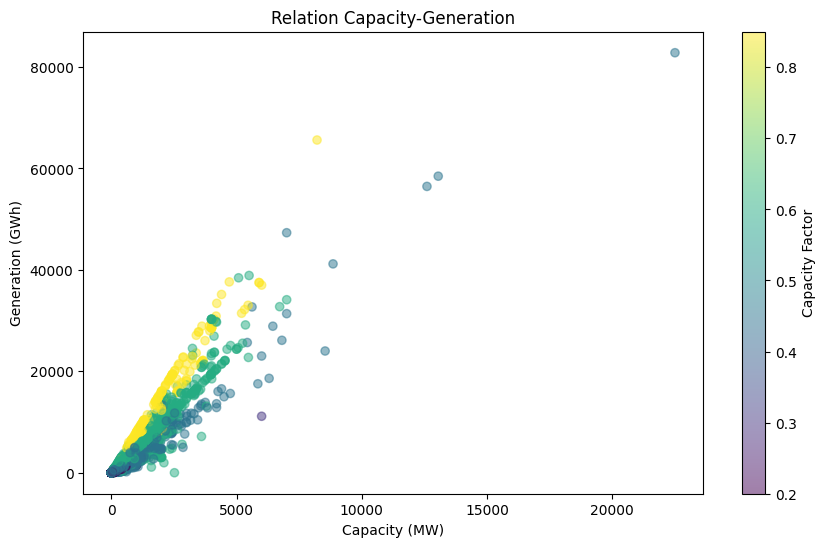

In [35]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    power_plants['capacity_mw'], 
    power_plants['generation_gwh'],
    alpha=0.5,
    c=power_plants['capacity_factor']  # Couleur par type d'énergie
)
plt.xlabel('Capacity (MW)')
plt.ylabel('Generation (GWh)')
plt.title('Relation Capacity-Generation')
plt.colorbar(label='Capacity Factor')
plt.show()

II. Exploratory Data Analysis

In [36]:
# Summary statistics
print("\nCapacity Statistics (MW):")
print(power_plants['capacity_mw'].describe())


Capacity Statistics (MW):
count    34936.000000
mean       163.355148
std        489.636078
min          1.000000
25%          4.900000
50%         16.745001
75%         75.344252
max      22500.000000
Name: capacity_mw, dtype: float64


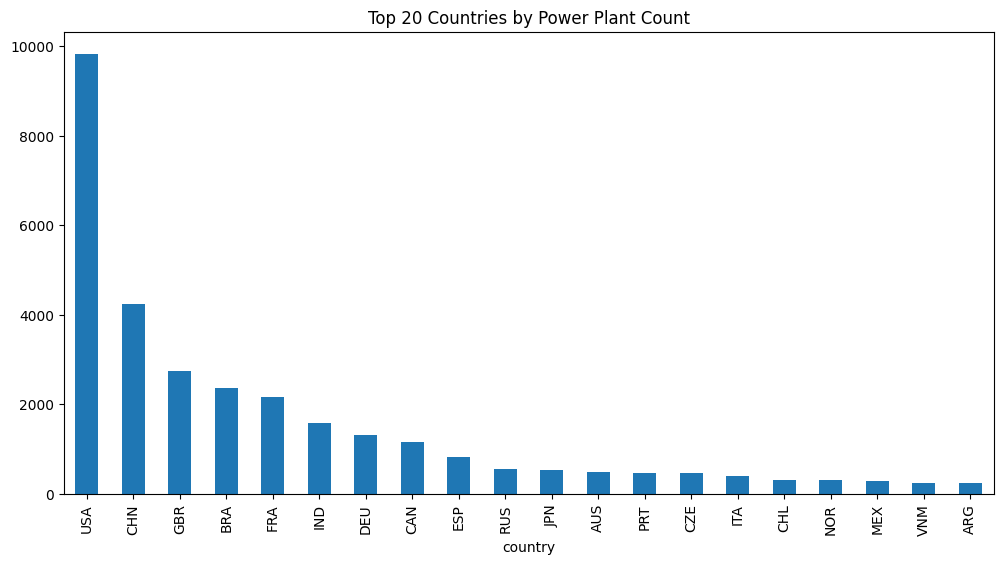

In [37]:
# Distribution by country and fuel type
plt.figure(figsize=(12,6))
power_plants['country'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 Countries by Power Plant Count')
plt.show()

III. Statistical Analysis

In [41]:
from scipy.stats import f_oneway

# Compare capacity by fuel type
fuel_groups = power_plants.groupby('primary_fuel')['capacity_mw'].apply(list)
f_stat, p_value = f_oneway(*fuel_groups)

print(f"\nANOVA Results for Capacity by Fuel Type:")
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")



ANOVA Results for Capacity by Fuel Type:
F-statistic: 967.46, p-value: 0.0000


In [39]:
# Significant difference between groups
if p_value < 0.05:
    print("Significant differences exist between fuel types.")
    
    # Post-hoc analysis
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(
        power_plants['capacity_mw'],
        power_plants['primary_fuel'],
        alpha=0.05
    )
    print(tukey.summary())

Significant differences exist between fuel types.


ModuleNotFoundError: No module named 'statsmodels'

In [42]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Significant difference between groups
if p_value < 0.05:
    print("Significant differences exist between fuel types.")
    
    # Post-hoc analysis
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(
        power_plants['capacity_mw'],
        power_plants['primary_fuel'],
        alpha=0.05
    )
    print(tukey.summary())

Significant differences exist between fuel types.


/Users/teddan/Desktop/GenAI/.venv/lib/python3.13/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1         group2      meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------
       Biomass           Coal   819.6069    0.0   772.2455   866.9683   True
       Biomass   Cogeneration    74.7588 0.9985  -148.5588   298.0763  False
       Biomass            Gas   349.4764    0.0   306.0347   392.9182   True
       Biomass     Geothermal     43.158 0.9917   -65.9611   152.2772  False
       Biomass          Hydro   123.1986    0.0    82.3602    164.037   True
       Biomass        Nuclear  2067.8822    0.0  1960.2561  2175.5084   True
       Biomass            Oil    88.9058    0.0    41.5056    136.306   True
       Biomass          Other    60.0471 0.9998  -158.1634   278.2576  False
       Biomass        Petcoke   178.0752 0.9794  -230.6209   586.7713  False
       Biomass          Solar    -6.3159    1.0   -46.0196    33.3878  False

IV. Time Series Analysis

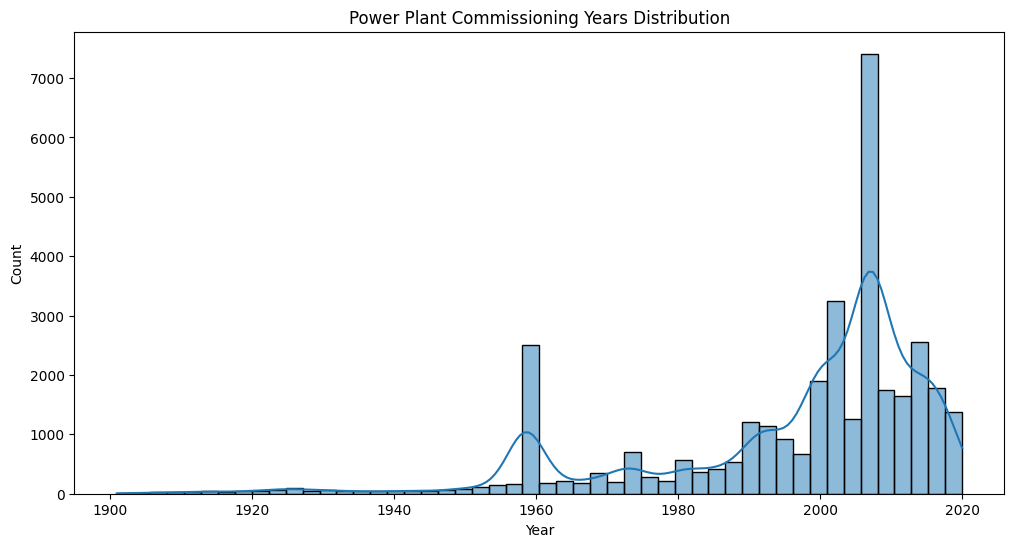

In [44]:
# Analyze commissioning year trends
commission_years = power_plants['commissioning_year'].dropna()
commission_years = commission_years[commission_years > 1900]  # Remove outliers

plt.figure(figsize=(12,6))
sns.histplot(commission_years, bins=50, kde=True)
plt.title('Power Plant Commissioning Years Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<Figure size 1400x800 with 0 Axes>

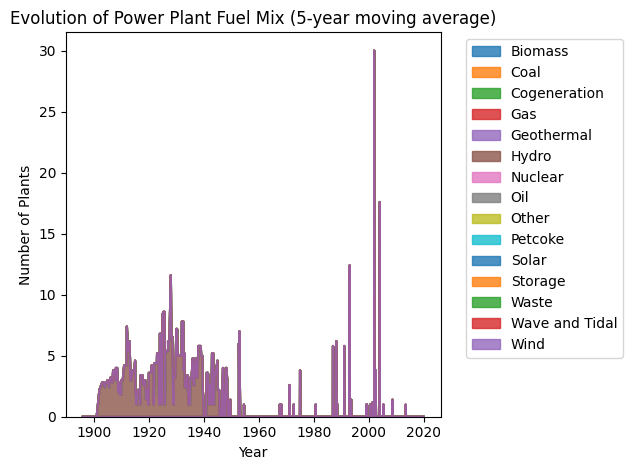

In [45]:
# Fuel mix evolution
fuel_evolution = power_plants.groupby(['commissioning_year', 'primary_fuel']).size().unstack()
fuel_evolution = fuel_evolution.rolling(window=5).mean()  # 5-year moving average

plt.figure(figsize=(14,8))
fuel_evolution.plot.area(stacked=True, alpha=0.8)
plt.title('Evolution of Power Plant Fuel Mix (5-year moving average)')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

V. Advanced Visualization

In [47]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 49.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [geopandas]/5 [geopandas]
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install geodatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [geodatasets]
Note: you may need to restart the kernel to use updated packages.


In [51]:
import geodatasets
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

In [55]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [58]:
from itertools import combinations
from scipy.stats import ttest_ind

# Liste des types de carburant uniques
fuel_types = power_plants['primary_fuel'].unique()

# Comparaisons deux à deux
for fuel1, fuel2 in combinations(fuel_types, 2):
    data1 = power_plants[power_plants['primary_fuel'] == fuel1]['capacity_mw']
    data2 = power_plants[power_plants['primary_fuel'] == fuel2]['capacity_mw']
    
    t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
    
    if p_val < 0.05:  # Seuil de significativité
        print(f"{fuel1} vs {fuel2}: p-value = {p_val:.4f} (Différence significative)")
    else:
        print(f"{fuel1} vs {fuel2}: p-value = {p_val:.4f}")


Hydro vs Solar: p-value = 0.0000 (Différence significative)
Hydro vs Gas: p-value = 0.0000 (Différence significative)
Hydro vs Other: p-value = 0.0089 (Différence significative)
Hydro vs Oil: p-value = 0.0010 (Différence significative)
Hydro vs Wind: p-value = 0.0000 (Différence significative)
Hydro vs Nuclear: p-value = 0.0000 (Différence significative)
Hydro vs Coal: p-value = 0.0000 (Différence significative)
Hydro vs Waste: p-value = 0.0000 (Différence significative)
Hydro vs Biomass: p-value = 0.0000 (Différence significative)
Hydro vs Wave and Tidal: p-value = 0.0189 (Différence significative)
Hydro vs Petcoke: p-value = 0.6981
Hydro vs Geothermal: p-value = 0.0000 (Différence significative)
Hydro vs Storage: p-value = 0.0000 (Différence significative)
Hydro vs Cogeneration: p-value = 0.2851
Solar vs Gas: p-value = 0.0000 (Différence significative)
Solar vs Other: p-value = 0.0047 (Différence significative)
Solar vs Oil: p-value = 0.0000 (Différence significative)
Solar vs Wind: 

In [59]:
import statsmodels
print(statsmodels.__version__)  # Doit afficher la version installée

0.14.4


In [61]:
import geodatasets
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

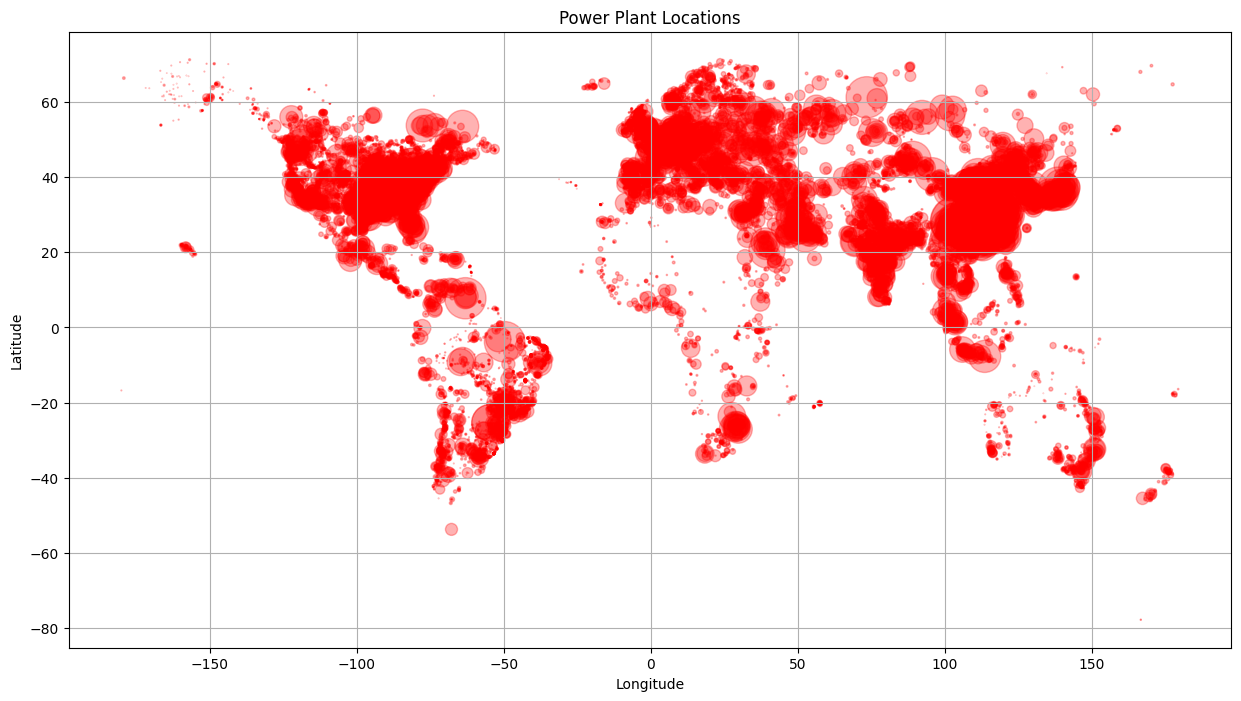

In [62]:
plt.figure(figsize=(15, 8))
plt.scatter(
    x=power_plants['longitude'],
    y=power_plants['latitude'],
    s=power_plants['capacity_mw']/10,  # Taille proportionnelle
    alpha=0.3,
    c='red'
)
plt.title('Power Plant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

VI. Matrix Operations

In [64]:
# Create a fuel-country capacity matrix
fuel_country_matrix = pd.pivot_table(
    power_plants,
    values='capacity_mw',
    index='country',
    columns='primary_fuel',
    aggfunc=np.sum,
    fill_value=0
)

# Normalize the matrix
matrix_normalized = fuel_country_matrix / fuel_country_matrix.sum(axis=1)[:, np.newaxis]

# Calculate correlation matrix
correlation_matrix = np.corrcoef(matrix_normalized.T)

plt.figure(figsize=(12,10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    xticklabels=matrix_normalized.columns,
    yticklabels=matrix_normalized.columns,
    cmap='coolwarm',
    center=0
)
plt.title('Correlation Between Fuel Types Across Countries')
plt.show()

# Eigenanalysis of the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print("\nEigenvalues of the correlation matrix:")
print(eigenvalues)

/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_67555/3337495399.py:2: FutureWarning: The provided callable <function sum at 0x107cbd8a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  fuel_country_matrix = pd.pivot_table(


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [66]:

from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l1')
matrix_normalized = normalizer.fit_transform(fuel_country_matrix)
correlation_matrix = np.corrcoef(matrix_normalized.T)


Visualisation de la Matrice de Corrélation

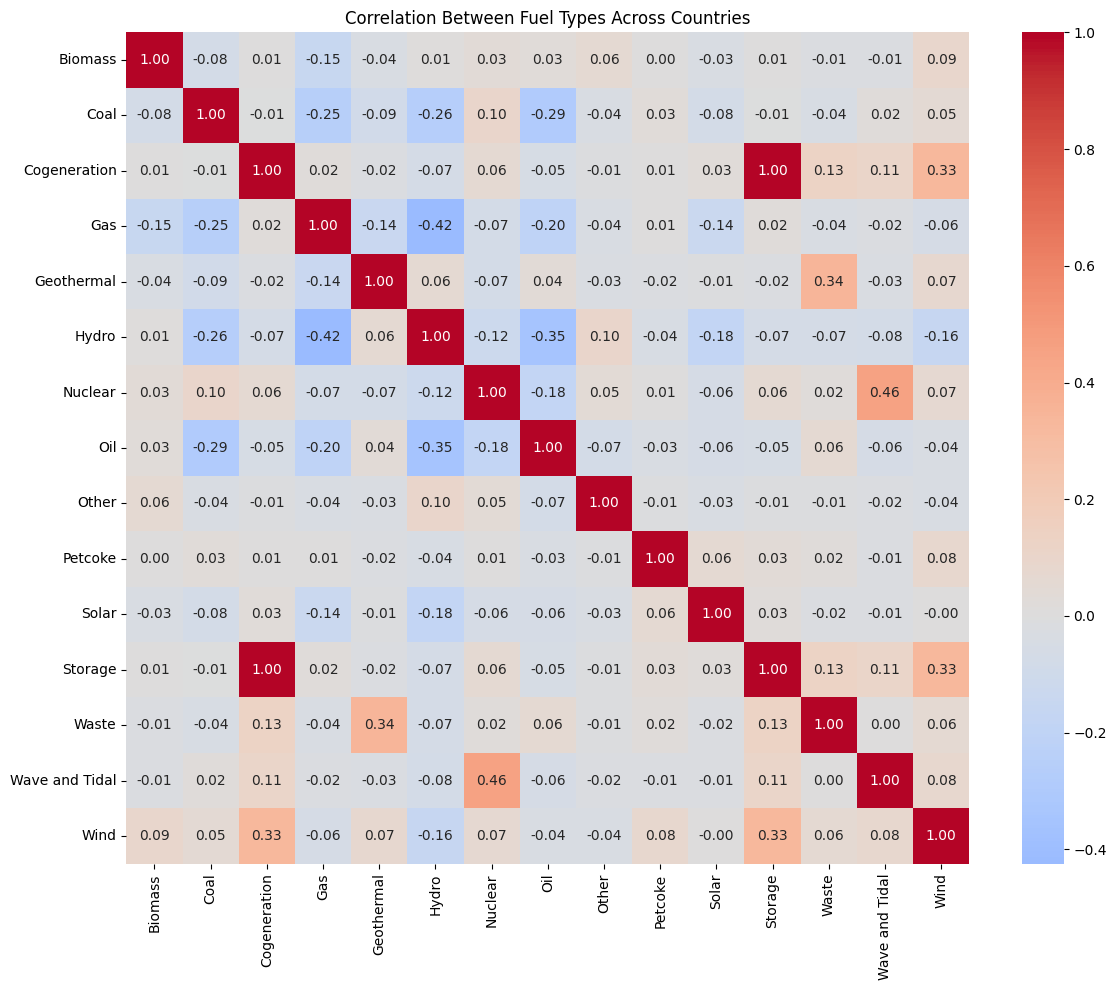

In [67]:
plt.figure(figsize=(12,10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    xticklabels=fuel_country_matrix.columns,
    yticklabels=fuel_country_matrix.columns,
    cmap='coolwarm',
    center=0,
    fmt=".2f"
)
plt.title('Correlation Between Fuel Types Across Countries')
plt.tight_layout()
plt.show()

Vérification Finale

In [68]:

print("Matrice normalisée (exemple):")
print(matrix_normalized[:5, :5])  # Affiche un subset
print("\nShape:", matrix_normalized.shape)

Matrice normalisée (exemple):
[[0.         0.         0.         0.1397438  0.        ]
 [0.         0.         0.         0.15280345 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.9723019  0.        ]
 [0.         0.14758267 0.         0.396251   0.        ]]

Shape: (167, 15)



Top 10% capacity plants: 3494


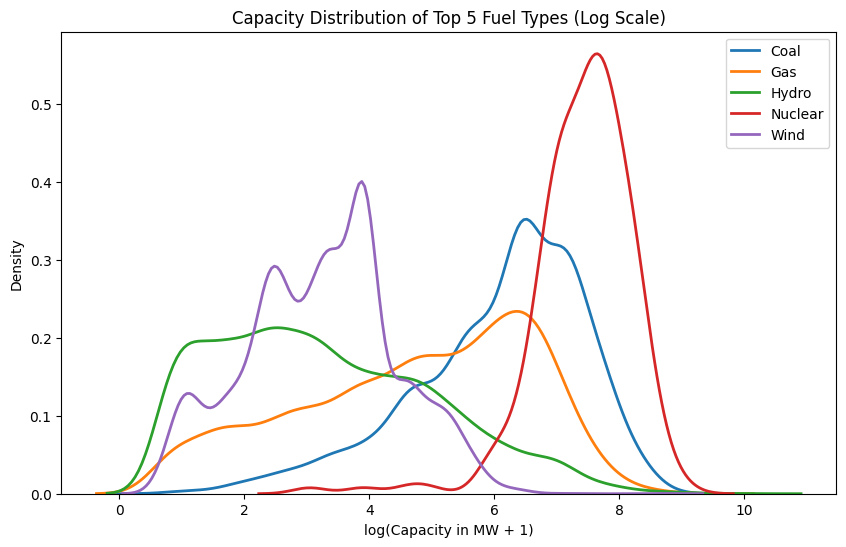

In [69]:
# Example 1: Complex filtering with NumPy
high_capacity = power_plants[
    (power_plants['capacity_mw'] > np.percentile(power_plants['capacity_mw'], 90))
]
print(f"\nTop 10% capacity plants: {len(high_capacity)}")

# Example 2: Enhanced visualization with NumPy
fuel_capacity = power_plants.groupby('primary_fuel')['capacity_mw'].sum()
top_fuels = fuel_capacity.nlargest(5).index

plt.figure(figsize=(10,6))
for fuel in top_fuels:
    data = power_plants[power_plants['primary_fuel'] == fuel]['capacity_mw']
    sns.kdeplot(
        np.log(data + 1),  # Using NumPy for log transform
        label=fuel,
        lw=2
    )
plt.title('Capacity Distribution of Top 5 Fuel Types (Log Scale)')
plt.xlabel('log(Capacity in MW + 1)')
plt.legend()
plt.show()